# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd 
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_btc = requests.get(btc_url).json()

# Fetch current ETH price
response_eth = requests.get(eth_url).json()

In [6]:
# Compute current value of my crypto
my_btc_value = response_btc['data']['1']['quotes']['CAD']['price']
my_eth_value = response_eth['data']['1027']['quotes']['CAD']['price']

In [7]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $61453.59
The current value of your 5.3 ETH is $5113.17


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2021-12-03", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    limit = 1000,
    end = today
).df

# Preview DataFrame
df_portfolio.tail()

AGG                                           \
                             open      high       low    close      volume   
time                                                                         
2021-11-29 00:00:00-05:00  114.15  114.6000  114.1300  114.550   7604952.0   
2021-11-30 00:00:00-05:00  114.87  115.1074  114.5000  114.765  10624796.0   
2021-12-01 00:00:00-05:00  114.27  114.6400  114.2100  114.610  11306707.0   
2021-12-02 00:00:00-05:00  114.67  114.7900  114.4001  114.610   7507924.0   
2021-12-03 00:00:00-05:00  114.50  115.2400  114.4600  115.060   7279561.0   

                              SPY                                       
                             open    high     low   close       volume  
time                                                                    
2021-11-29 00:00:00-05:00  464.07  466.56  461.73  464.63   68239627.0  
2021-11-30 00:00:00-05:00  462.00  464.03  455.30  455.78  126381409.0  
2021-12-01 00:00:00-05:00  461.64  464.67  450.29  450.53  112177764.0  
2021-12-02 00:00:00-05:00  450.72  459.07  450.31  457.38  109873511.0  
2021-12-03 00:00:00-05:00  459.17  460.30  448.92  453.43  124795750.0

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio.iloc[-1]['AGG']['close'])
spy_close_price = float(df_portfolio.iloc[-1]['SPY']['close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.06
Current SPY closing price: $453.43


In [12]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22671.50
The current value of your 200 AGG shares is $23012.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
combined_assets = ['Crypto', 'Shares']
amount = [round((my_btc_value + my_eth_value), 2), (my_agg_value + my_spy_value)]
# Create savings DataFrame
df_savings = pd.DataFrame({'Amount': amount}, index=combined_assets)

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,66566.77
Shares,45683.50


<AxesSubplot:title={'center':'Total Savings Composition'}, ylabel='Amount'>

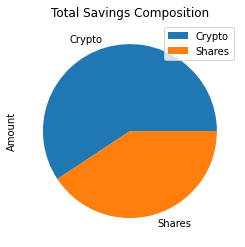

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount', title="Total Savings Composition")

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = (my_btc_value + my_eth_value) + (my_agg_value + my_spy_value)

# Validate saving health
if savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif savings == emergency_fund:
    print("Congratulations! You have reached your financial goal")
elif savings < emergency_fund:
    print(f"You are ${emergency_fund - savings} away from reaching your financial goal")
        

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-12-05', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-12-05', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    limit = 1000,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high      low   close     volume    open   
time                                                                            
2017-12-13 00:00:00-05:00  109.23  109.55  109.135  109.41  2638160.0     NaN   
2017-12-14 00:00:00-05:00  109.31  109.51  109.230  109.45  3698172.0  267.12   
2017-12-15 00:00:00-05:00  109.42  109.55  109.315  109.47  2034072.0  265.45   
2017-12-18 00:00:00-05:00  109.47  109.47  109.250  109.31  3090761.0  268.08   
2017-12-19 00:00:00-05:00  109.14  109.16  108.890  109.00  2583809.0  268.48   

                                                               
                             high     low   close      volume  
time                                                           
2017-12-13 00:00:00-05:00     NaN     NaN     NaN         NaN  
2017-12-14 00:00:00-05:00  267.22  265.60  265.67  57343318.0  
2017-12-15 00:00:00-05:00  267.04  265.39  266.53  59269913.0  
2017-12-18 00:00:00-05:00  268.60  267.98  268.18  45691370.0  
2017-12-19 00:00:00-05:00  268.53  267.09  267.22  46990895.0

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [19]:
# Printing the simulation input data
MC_stock_data.portfolio_data.head()

AGG                                      \
                             open    high      low   close     volume   
time                                                                    
2017-12-13 00:00:00-05:00  109.23  109.55  109.135  109.41  2638160.0   
2017-12-14 00:00:00-05:00  109.31  109.51  109.230  109.45  3698172.0   
2017-12-15 00:00:00-05:00  109.42  109.55  109.315  109.47  2034072.0   
2017-12-18 00:00:00-05:00  109.47  109.47  109.250  109.31  3090761.0   
2017-12-19 00:00:00-05:00  109.14  109.16  108.890  109.00  2583809.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-12-13 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2017-12-14 00:00:00-05:00     0.000366  267.12  267.22  265.60  265.67   
2017-12-15 00:00:00-05:00     0.000183  265.45  267.04  265.39  266.53   
2017-12-18 00:00:00-05:00    -0.001462  268.08  268.60  267.98  268.18   
2017-12-19 00:00:00-05:00    -0.002836  268.48  268.53  267.09  267.22   

                                                    
                               volume daily_return  
time                                                
2017-12-13 00:00:00-05:00         NaN          NaN  
2017-12-14 00:00:00-05:00  57343318.0          NaN  
2017-12-15 00:00:00-05:00  59269913.0     0.003237  
2017-12-18 00:00:00-05:00  45691370.0     0.006191  
2017-12-19 00:00:00-05:00  46990895.0    -0.003580

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/tyesondemets/Desktop/Git/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986940,1.013995,0.983139,0.994430,1.002382,1.010762,0.990779,1.003396,0.995824,1.005443,...,1.002714,1.005690,0.987873,1.005417,0.996686,0.996122,0.989739,1.007078,1.008410,1.010467
2,0.977105,1.030582,0.977801,0.986604,1.004438,1.020172,0.998276,1.007354,0.999610,1.010489,...,0.998032,1.015074,0.995323,1.016976,1.014391,0.995485,0.996693,1.009378,1.005441,1.013528
3,0.976779,1.024004,0.986413,0.981887,1.001924,1.022523,1.002937,1.016562,1.005045,1.021134,...,1.001366,1.016983,1.004825,1.015342,1.023200,1.001521,0.985861,1.006220,1.015087,1.018718
4,0.986098,0.996744,0.982256,0.987299,1.008542,1.014097,1.006109,1.006477,0.996107,1.031540,...,0.997600,1.033697,1.005371,1.021669,1.017361,1.000827,0.993772,1.010543,1.026367,1.037349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.627497,7.489784,25.797839,24.010916,5.093337,5.509703,16.541618,10.038921,36.388764,8.827084,...,11.760093,36.522390,23.086698,4.714241,18.526106,49.973218,75.940147,9.877678,32.439273,39.682064
7557,14.516709,7.402081,25.937461,24.126472,5.113073,5.540608,16.610377,10.061370,36.291616,8.799277,...,11.839162,36.257120,23.083812,4.718078,18.344517,49.777651,75.926583,9.959903,32.594640,39.864516
7558,14.605704,7.427170,25.961507,23.990781,5.066554,5.488995,16.545804,10.037966,36.504571,8.817430,...,11.752322,36.349425,22.783736,4.699876,18.421753,49.839490,76.306022,10.029067,32.490465,40.247754
7559,14.931905,7.451890,25.767388,24.254269,5.071386,5.410965,16.783920,10.002295,36.618160,8.762306,...,11.695104,36.745704,22.866235,4.626859,18.557527,50.111257,75.519255,10.083680,32.032578,40.478545


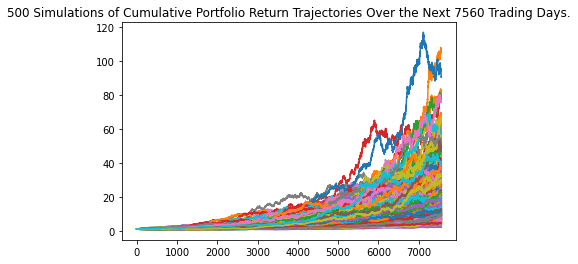

In [21]:
# Plot simulation outcomes
line_plot = MC_stock_data.plot_simulation()

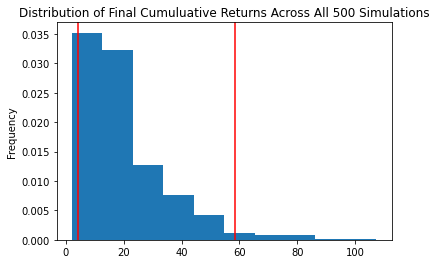

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stock_data.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_stock_data.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             20.405494
std              14.919987
min               2.141863
25%              10.227047
50%              16.388021
75%              25.238465
max             107.246810
95% CI Lower      4.104703
95% CI Upper     58.504395
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $82094.06 and $1170087.9


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment_2 = round(20000 * 1.5)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower2 = round(tbl[8]*initial_investment_2,2)
ci_upper2 = round(tbl[9]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower2} and ${ci_upper2}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within in the range of $123141.09 and $1755131.86


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_retirement_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.2, .8],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_retirement_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/tyesondemets/Desktop/Git/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002559,1.001861,1.007639,1.010779,0.995752,0.983408,0.998280,1.010929,0.987686,1.005831,...,1.003356,0.992741,0.989129,1.004529,1.003593,1.005049,1.010552,0.996218,0.975278,0.996646
2,1.027494,1.005370,1.009718,1.005162,1.002466,0.987276,0.979422,1.018659,0.993701,1.020766,...,0.990708,1.026034,0.988984,1.010177,1.006168,1.005941,1.027980,1.004878,0.968625,0.986513
3,1.018785,1.006705,1.019228,1.000858,0.999940,0.996129,0.965129,1.014153,0.984869,1.015685,...,0.987556,1.022531,0.990390,1.006393,1.022885,1.016578,1.026602,1.003374,0.960841,1.007559
4,1.021701,1.010348,1.024853,0.974259,1.013098,0.970200,0.966908,1.019299,1.005062,1.013839,...,0.990052,1.023243,1.021230,1.014556,1.028136,0.996694,1.007182,0.994105,0.964010,1.023325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.164805,2.879669,0.874125,1.203792,2.083122,0.826782,3.234410,2.034707,3.603546,2.117816,...,3.007218,1.401764,1.186748,1.643596,1.062523,1.766245,2.756960,2.581654,0.924692,2.509863
1257,2.144812,2.876929,0.866022,1.223207,2.106980,0.816663,3.232339,2.029275,3.642999,2.134367,...,2.976316,1.380382,1.196702,1.638351,1.062047,1.743206,2.672028,2.584856,0.911443,2.523278
1258,2.159453,2.909376,0.871807,1.215712,2.096084,0.821016,3.271062,2.017831,3.653848,2.104162,...,2.996754,1.381728,1.207606,1.627007,1.060372,1.733262,2.724257,2.609022,0.924803,2.535488
1259,2.132800,2.931992,0.866573,1.219791,2.076703,0.834557,3.323577,2.032916,3.671526,2.102064,...,3.015637,1.378405,1.223640,1.626373,1.058470,1.719376,2.747611,2.592014,0.915685,2.579376


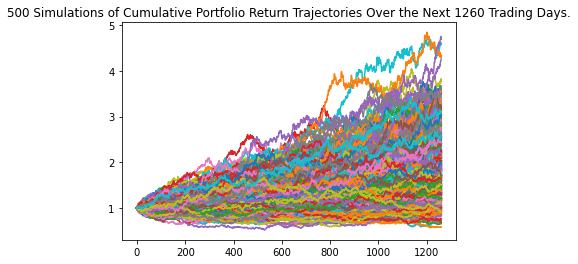

In [28]:
# Plot simulation outcomes
plot_retirement_5 = MC_retirement_5.plot_simulation()

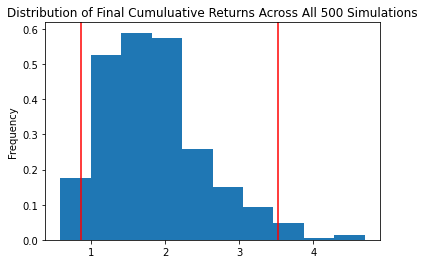

In [29]:
# Plot probability distribution and confidence intervals
dist_retirement_5 = MC_retirement_5.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
retirement_5_tbl = MC_retirement_5.summarize_cumulative_return()

# Print summary statistics
print(retirement_5_tbl)

count           500.000000
mean              1.855840
std               0.684226
min               0.589450
25%               1.341053
50%               1.754702
75%               2.206068
max               4.691566
95% CI Lower      0.870116
95% CI Upper      3.518001
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment_five = 50000 

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(retirement_5_tbl[8]*initial_investment_five,2)
ci_upper_five = round(retirement_5_tbl[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $43505.8 and $175900.05


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_retirement_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.2, .8],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_retirement_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/tyesondemets/Desktop/Git/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003996,0.998158,0.991703,0.987923,1.000708,0.999504,0.987996,1.008198,1.005150,1.002162,...,1.025204,0.979633,1.004983,0.981630,0.991771,1.002704,1.012265,1.004671,0.961049,0.998347
2,1.004068,1.024420,0.997535,0.994706,1.021873,0.986578,0.996578,1.026498,1.008547,0.996224,...,1.019018,0.975805,1.010885,0.983911,0.974783,1.019797,1.015162,1.022172,0.959735,0.998743
3,0.996641,1.020386,0.980135,0.989517,1.023491,0.992913,0.996774,1.030592,1.007510,0.993298,...,1.027275,0.990095,1.038696,0.973759,0.965155,1.015363,1.009389,1.037601,0.952255,1.000506
4,0.999425,1.025473,0.994512,0.987666,1.028637,1.001359,0.989903,1.037676,0.998948,0.991792,...,1.021461,0.985860,1.041617,0.969695,0.965271,1.013288,1.001050,1.032773,0.936531,0.994737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.845087,3.007750,2.173206,3.720742,6.689857,1.263795,4.198641,3.862550,1.559073,1.818406,...,1.428814,3.506496,3.315698,1.719284,1.470503,2.731501,3.160569,2.526632,2.806309,6.012059
2517,3.843023,3.075805,2.154479,3.699961,6.797500,1.272378,4.309237,3.933733,1.542085,1.815398,...,1.419702,3.497168,3.363522,1.759787,1.487233,2.698291,3.212302,2.552273,2.818865,6.111935
2518,3.881135,3.093688,2.160011,3.739471,6.712163,1.288634,4.382471,3.856213,1.565910,1.796310,...,1.415848,3.491030,3.358769,1.764974,1.484206,2.729270,3.227498,2.512250,2.828545,6.215374
2519,3.854922,3.107063,2.141728,3.740703,6.677894,1.285220,4.423453,3.891605,1.538929,1.816597,...,1.402988,3.430056,3.405791,1.758497,1.476608,2.729818,3.220048,2.506289,2.832878,6.218889


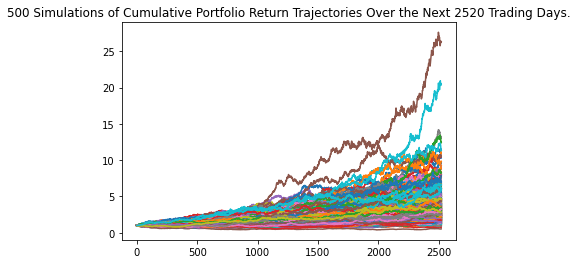

In [34]:
# Plot simulation outcomes
plot_retirement_10 = MC_retirement_10.plot_simulation()

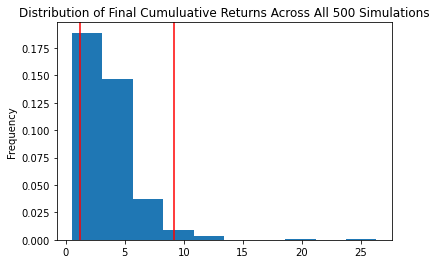

In [35]:
# Plot probability distribution and confidence intervals
dist_retirement_10 = MC_retirement_10.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
retirement_10_tbl = MC_retirement_10.summarize_cumulative_return()

# Print summary statistics
print(retirement_10_tbl)

count           500.000000
mean              3.697646
std               2.350259
min               0.527622
25%               2.193164
50%               3.176057
75%               4.590185
max              26.345165
95% CI Lower      1.191400
95% CI Upper      9.187210
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment_ten = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(retirement_10_tbl[8]*initial_investment_ten,2)
ci_upper_ten = round(retirement_10_tbl[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $59570.01 and $459360.51
